In [1]:
from pyspark.sql import SparkSession

In [8]:
spark=SparkSession.builder.appName('assignment3').getOrCreate()

In [9]:
passData=spark.read.csv('passenger_dataset.csv',header=True,inferSchema=True)

In [10]:
passData.show()

+-----------+--------------+
|PassengerId|          Name|
+-----------+--------------+
|          1|  Amanda Minaj|
|          2|  Amanda Minaj|
|          3|   Smith Jonas|
|          4|   Smith Jonas|
|          5|   Jones Drake|
|          6|  Amanda Minaj|
|          7|   Jones Drake|
|          8|   Brown Munde|
|          9|   Brown Munde|
|         10|Williams Obama|
|         11| Salena Bieber|
|         12|   Jones Drake|
|         13|   Brown Munde|
|         14| Johnson Swift|
|         15|   Smith Jonas|
|         16| Salena Bieber|
|         17|Williams Obama|
|         18|   Jones Drake|
|         19|   Brown Munde|
|         20|  Amanda Minaj|
+-----------+--------------+
only showing top 20 rows



In [12]:
titanicData=spark.read.csv('titanic.csv',header=True,inferSchema=True)

In [21]:
titanicData.show()

+-----------+--------+------+------+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+------+----+-----+-----+-------+--------+
|          1|       0|     3|  Male|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|female|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|female|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|female|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  Male|35.0|    0|    0|   8.05|       3|
|          6|       0|     3|  Male|60.0|    0|    0| 8.4583|       2|
|          7|       0|     1|  Male|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  Male| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|female|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|female|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|female| 4.0|    1|    1|   16.7|       3|
|     

In [106]:
titanicData.describe().show()

+-------+------------------+-------------------+------------------+------+------------------+------------------+-------------------+-----------------+------------------+---------+
|summary|       PassengerId|           Survived|            Pclass|   Sex|               Age|             SibSp|              Parch|             Fare|          Embarked|age_group|
+-------+------------------+-------------------+------------------+------+------------------+------------------+-------------------+-----------------+------------------+---------+
|  count|               889|                889|               889|   889|               889|               889|                889|              889|               889|      889|
|   mean|             446.0|0.38245219347581555|2.3115860517435323|  null|35.686355455568055|0.5241844769403825|0.38245219347581555|32.09668087739029|2.5354330708661417|     null|
| stddev|256.99817277718313|0.48625968831477334|0.8346997785705753|  null| 17.75673267160393| 1.1037

In [38]:
titanicData.describe()

DataFrame[summary: string, PassengerId: string, Survived: string, Pclass: string, Sex: string, Age: string, SibSp: string, Parch: string, Fare: string, Embarked: string]

In [39]:
titanicData.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: integer (nullable = true)



In [107]:
titanicData.count()

889

In [41]:
titanicData.na.drop(how="all").show()

+-----------+--------+------+------+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+------+----+-----+-----+-------+--------+
|          1|       0|     3|  Male|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|female|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|female|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|female|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  Male|35.0|    0|    0|   8.05|       3|
|          6|       0|     3|  Male|60.0|    0|    0| 8.4583|       2|
|          7|       0|     1|  Male|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  Male| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|female|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|female|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|female| 4.0|    1|    1|   16.7|       3|
|     

In [42]:
titanicData.na.drop(how="any").show()

+-----------+--------+------+------+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+------+----+-----+-----+-------+--------+
|          1|       0|     3|  Male|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|female|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|female|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|female|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  Male|35.0|    0|    0|   8.05|       3|
|          6|       0|     3|  Male|60.0|    0|    0| 8.4583|       2|
|          7|       0|     1|  Male|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  Male| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|female|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|female|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|female| 4.0|    1|    1|   16.7|       3|
|     

In [43]:
titanicData.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [44]:
titanicData.filter(titanicData.PassengerId.isNull()).show()

+-----------+--------+------+---+---+-----+-----+----+--------+
|PassengerId|Survived|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked|
+-----------+--------+------+---+---+-----+-----+----+--------+
+-----------+--------+------+---+---+-----+-----+----+--------+



In [45]:
colNull=[col for col in titanicData.columns if titanicData.filter(f"{col} IS NULL").count()>0]
if colNull:
    print("Null in")
    for col in colNull:
        print(col)
else:
    print("None")

None


In [46]:
import pandas as pd
import matplotlib.pyplot as mp

In [89]:
# passData=spark.read.csv('passenger_data.csv',header=True,inferSchema=True)
passData=spark.read.csv('passenger_dataset.csv',header=True,inferSchema=True)
joined_df = titanicData.join(passData, on='PassengerId', how='inner')

# Show the joined DataFrame
joined_df.show()

+-----------+--------+------+------+----+-----+-----+-------+--------+--------------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|          Name|
+-----------+--------+------+------+----+-----+-----+-------+--------+--------------+
|          1|       0|     3|  Male|22.0|    1|    0|   7.25|       3|  Amanda Minaj|
|          2|       1|     1|female|38.0|    1|    0|71.2833|       1|  Amanda Minaj|
|          3|       1|     3|female|26.0|    0|    0|  7.925|       3|   Smith Jonas|
|          4|       1|     1|female|35.0|    1|    0|   53.1|       3|   Smith Jonas|
|          5|       0|     3|  Male|35.0|    0|    0|   8.05|       3|   Jones Drake|
|          6|       0|     3|  Male|60.0|    0|    0| 8.4583|       2|  Amanda Minaj|
|          7|       0|     1|  Male|54.0|    0|    0|51.8625|       3|   Jones Drake|
|          8|       0|     3|  Male| 2.0|    3|    1| 21.075|       3|   Brown Munde|
|          9|       1|     3|female|27.0|    0|    2|1

In [51]:
pid=list(titanicData.select('PassengerId').toPandas()['PassengerId'])

In [52]:
pid

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 18

In [54]:
pclass=list(titanicData.select('Pclass').toPandas()['Pclass'])

In [55]:
pclass


[3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 3,


In [57]:
gender=list(titanicData.select('Sex').toPandas()['Sex'])

In [59]:
gender


['Male',
 'female',
 'female',
 'female',
 'Male',
 'Male',
 'Male',
 'Male',
 'female',
 'female',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'female',
 'female',
 'female',
 'female',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'Male',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'female',
 'Male',
 'Male',
 'female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'female',
 'Male',
 'female',
 'Male',
 'Male',
 'Ma

In [61]:
survived=list(titanicData.select('Survived').toPandas()['Survived'])

In [62]:
survived

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


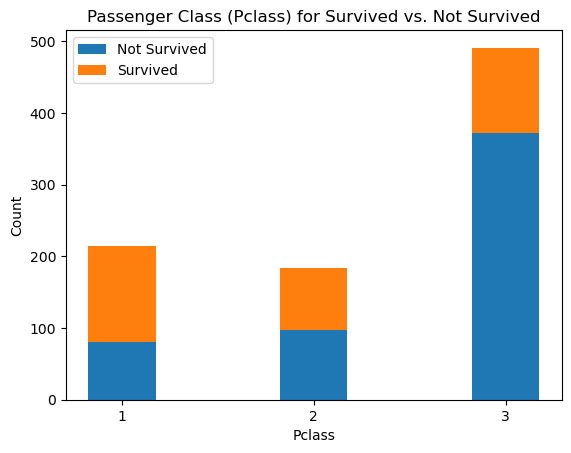

In [101]:


# Count the occurrences of each pclass for each survival status
survived_class_counts = {
    "Not Survived": [pclass[i] for i in range(len(survived)) if survived[i] == 0],
    "Survived": [pclass[i] for i in range(len(survived)) if survived[i] == 1],
}

# Get unique pclass values
unique_pclass = sorted(set(pclass))

# Count the occurrences of each pclass for both survival statuses
counts_not_survived = [survived_class_counts["Not Survived"].count(cls) for cls in unique_pclass]
counts_survived = [survived_class_counts["Survived"].count(cls) for cls in unique_pclass]

# Create the bar graph
width = 0.35  # Width of the bars
x = range(len(unique_pclass))

plt.bar(x, counts_not_survived, width, label="Not Survived")
plt.bar(x, counts_survived, width, bottom=counts_not_survived, label="Survived")

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class (Pclass) for Survived vs. Not Survived')
plt.xticks(x, unique_pclass)
plt.legend()
plt.show()


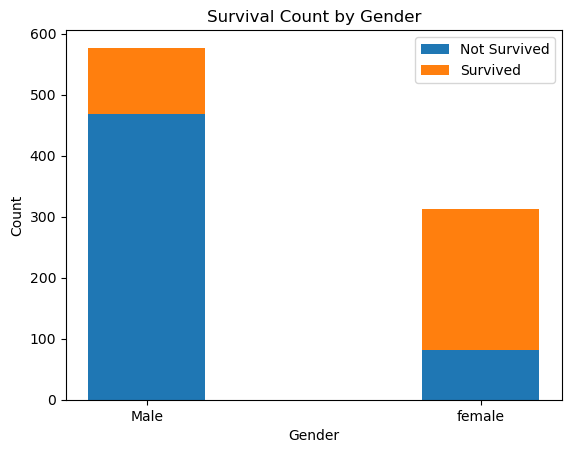

In [100]:

# Count the occurrences of each gender for each survival status
survived_gender_counts = {
    "Not Survived": [gender[i] for i in range(len(survived)) if survived[i] == 0],
    "Survived": [gender[i] for i in range(len(survived)) if survived[i] == 1],
}

# Get unique genders
unique_genders = sorted(set(gender))

# Count the occurrences of each gender for both survival statuses
counts_not_survived = [survived_gender_counts["Not Survived"].count(g) for g in unique_genders]
counts_survived = [survived_gender_counts["Survived"].count(g) for g in unique_genders]

# Create the bar graph
width = 0.35  # Width of the bars
x = range(len(unique_genders))

plt.bar(x, counts_not_survived, width, label="Not Survived")
plt.bar(x, counts_survived, width, bottom=counts_not_survived, label="Survived")

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.xticks(x, unique_genders)
plt.legend()
plt.show()


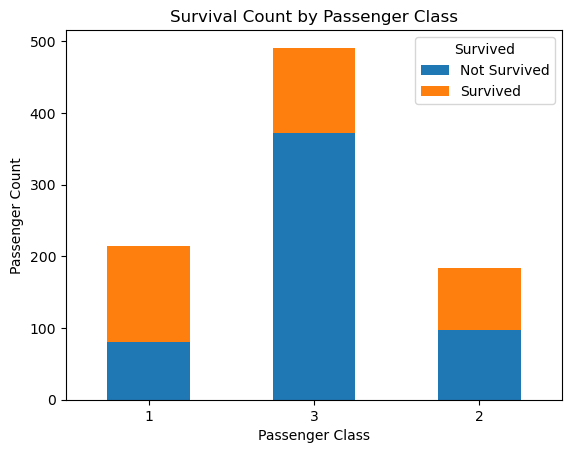

In [108]:

passenger_counts = (
    titanicData.groupBy("Pclass", "Survived")
    .count()
    .orderBy("Pclass", "Survived")
)

# Pivot the data to get separate columns for "Not Survived" and "Survived"
passenger_pivot = (
    passenger_counts
    .groupBy("Pclass")
    .pivot("Survived", [0, 1])
    .sum("count")
    .fillna(0)
)

# Convert the PySpark DataFrame to a pandas DataFrame for plotting
passenger_pandas = passenger_pivot.toPandas()

# Create the bar graph
passenger_pandas.plot(x="Pclass", kind='bar', stacked=True)

plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.title('Survival Count by Passenger Class')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


In [79]:
ageRange=list(titanicData.select('Age').toPandas()['Age'])

In [118]:
from pyspark.sql.functions import when, col, lit

passenger_age = titanicData.withColumn("age_group",
    when(col("Age") < 20, lit("0-20"))
    .when((col("Age") >= 20) & (col("Age") < 40), lit("20-40"))
    .when((col("Age") >= 40) & (col("Age") < 60), lit("40-60"))
    .when((col("Age") >= 60) & (col("Age") < 80), lit("60-80"))
    .otherwise(lit("80-100"))
)

passenger_age.show()


+-----------+--------+------+------+----+-----+-----+-------+--------+---------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|age_group|
+-----------+--------+------+------+----+-----+-----+-------+--------+---------+
|          1|       0|     3|  Male|22.0|    1|    0|   7.25|       3|    20-40|
|          2|       1|     1|female|38.0|    1|    0|71.2833|       1|    20-40|
|          3|       1|     3|female|26.0|    0|    0|  7.925|       3|    20-40|
|          4|       1|     1|female|35.0|    1|    0|   53.1|       3|    20-40|
|          5|       0|     3|  Male|35.0|    0|    0|   8.05|       3|    20-40|
|          6|       0|     3|  Male|60.0|    0|    0| 8.4583|       2|    60-80|
|          7|       0|     1|  Male|54.0|    0|    0|51.8625|       3|    40-60|
|          8|       0|     3|  Male| 2.0|    3|    1| 21.075|       3|     0-20|
|          9|       1|     3|female|27.0|    0|    2|11.1333|       3|    20-40|
|         10|       1|     2

In [121]:
ageRange

['20-40',
 '20-40',
 '20-40',
 '20-40',
 '20-40',
 '60-80',
 '40-60',
 '0-20',
 '20-40',
 '0-20',
 '0-20',
 '40-60',
 '20-40',
 '20-40',
 '0-20',
 '40-60',
 '0-20',
 '60-80',
 '20-40',
 '60-80',
 '20-40',
 '20-40',
 '0-20',
 '20-40',
 '0-20',
 '20-40',
 '60-80',
 '0-20',
 '60-80',
 '60-80',
 '40-60',
 '60-80',
 '60-80',
 '60-80',
 '20-40',
 '40-60',
 '60-80',
 '20-40',
 '0-20',
 '0-20',
 '40-60',
 '20-40',
 '60-80',
 '0-20',
 '0-20',
 '60-80',
 '60-80',
 '60-80',
 '60-80',
 '0-20',
 '0-20',
 '20-40',
 '40-60',
 '20-40',
 '60-80',
 '60-80',
 '20-40',
 '20-40',
 '0-20',
 '0-20',
 '20-40',
 '40-60',
 '0-20',
 '60-80',
 '60-80',
 '20-40',
 '0-20',
 '0-20',
 '20-40',
 '20-40',
 '0-20',
 '20-40',
 '20-40',
 '20-40',
 '20-40',
 '60-80',
 '60-80',
 '0-20',
 '20-40',
 '20-40',
 '20-40',
 '60-80',
 '20-40',
 '0-20',
 '20-40',
 '0-20',
 '60-80',
 '20-40',
 '20-40',
 '20-40',
 '20-40',
 '40-60',
 '20-40',
 '40-60',
 '60-80',
 '60-80',
 '20-40',
 '20-40',
 '20-40',
 '20-40',
 '60-80',
 '20-40',
 '2

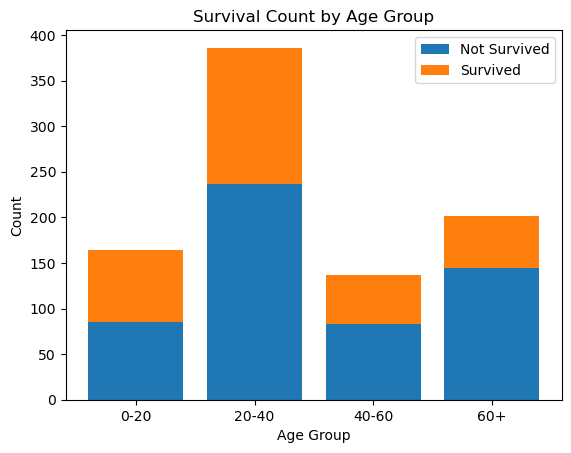

In [105]:
from pyspark.sql.functions import when, col, lit

# Create age_group column based on Age
titanicData = titanicData.withColumn("age_group",
    when(col("Age") < 20, lit("0-20"))
    .when((col("Age") >= 20) & (col("Age") < 40), lit("20-40"))
    .when((col("Age") >= 40) & (col("Age") < 60), lit("40-60"))
    .when(col("Age") >= 60, lit("60+"))
    .otherwise(lit("Unknown"))
)

# Group the data by age_group and calculate the count of survivors for each age group
age_survived_counts = (
    titanicData.groupBy("age_group", "Survived")
    .count()
    .orderBy("age_group", "Survived")
    .withColumnRenamed("count", "Count")
)

# Create the bar graph
age_survived_pivot = (
    age_survived_counts
    .groupBy("age_group")
    .pivot("Survived", [0, 1])
    .sum("Count")
    .fillna(0)
    .orderBy("age_group")
)

x_labels = age_survived_pivot.select("age_group").rdd.flatMap(lambda x: x).collect()
x = list(range(len(x_labels)))

plt.bar(x, age_survived_pivot.select("0").rdd.flatMap(lambda x: x).collect(), label='Not Survived')
plt.bar(x, age_survived_pivot.select("1").rdd.flatMap(lambda x: x).collect(), label='Survived', bottom=age_survived_pivot.select("0").rdd.flatMap(lambda x: x).collect())

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.xticks(x, x_labels)
plt.legend()
plt.show()


In [131]:
data=list(passData.select('name').toPandas()['name'])

In [137]:
data

['Amanda Minaj',
 'Amanda Minaj',
 'Smith Jonas',
 'Smith Jonas',
 'Jones Drake',
 'Amanda Minaj',
 'Jones Drake',
 'Brown Munde',
 'Brown Munde',
 'Williams Obama',
 'Salena Bieber',
 'Jones Drake',
 'Brown Munde',
 'Johnson Swift',
 'Smith Jonas',
 'Salena Bieber',
 'Williams Obama',
 'Jones Drake',
 'Brown Munde',
 'Amanda Minaj',
 'Amanda Minaj',
 'Johnson Swift',
 'Smith Jonas',
 'Brown Munde',
 'Salena Bieber',
 'Johnson Swift',
 'Jones Drake',
 'Johnson Swift',
 'Amanda Minaj',
 'Smith Jonas',
 'Amanda Minaj',
 'Amanda Minaj',
 'Smith Jonas',
 'Brown Munde',
 'Salena Bieber',
 'Jones Drake',
 'Salena Bieber',
 'Amanda Minaj',
 'Amanda Minaj',
 'Amanda Minaj',
 'Williams Obama',
 'Jones Drake',
 'Williams Obama',
 'Salena Bieber',
 'Williams Obama',
 'Salena Bieber',
 'Brown Munde',
 'Jones Drake',
 'Jones Drake',
 'Brown Munde',
 'Smith Jonas',
 'Amanda Minaj',
 'Johnson Swift',
 'Salena Bieber',
 'Amanda Minaj',
 'Jones Drake',
 'Johnson Swift',
 'Salena Bieber',
 'Salena Biebe

23/07/19 22:30:22 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

In [110]:
from pyspark.sql.functions import split

splitNames = spark.read.csv('passenger_dataset.csv', header=True, inferSchema=True)

# Split "name" column into "first_name" and "last_name" columns
splitNames = splitNames.withColumn("first_name", split(splitNames["Name"], " ").getItem(0))
splitNames = splitNames.withColumn("last_name", split(splitNames["Name"], " ").getItem(1))

# Show the DataFrame with first and last names
splitNames.select('Name', 'first_name', 'last_name').show()


+--------------+----------+---------+
|          Name|first_name|last_name|
+--------------+----------+---------+
|  Amanda Minaj|    Amanda|    Minaj|
|  Amanda Minaj|    Amanda|    Minaj|
|   Smith Jonas|     Smith|    Jonas|
|   Smith Jonas|     Smith|    Jonas|
|   Jones Drake|     Jones|    Drake|
|  Amanda Minaj|    Amanda|    Minaj|
|   Jones Drake|     Jones|    Drake|
|   Brown Munde|     Brown|    Munde|
|   Brown Munde|     Brown|    Munde|
|Williams Obama|  Williams|    Obama|
| Salena Bieber|    Salena|   Bieber|
|   Jones Drake|     Jones|    Drake|
|   Brown Munde|     Brown|    Munde|
| Johnson Swift|   Johnson|    Swift|
|   Smith Jonas|     Smith|    Jonas|
| Salena Bieber|    Salena|   Bieber|
|Williams Obama|  Williams|    Obama|
|   Jones Drake|     Jones|    Drake|
|   Brown Munde|     Brown|    Munde|
|  Amanda Minaj|    Amanda|    Minaj|
+--------------+----------+---------+
only showing top 20 rows



In [85]:
from pyspark.sql.functions import avg

In [86]:
average_fare_by_embarked = titanicData.groupBy("Embarked").agg(avg("Fare").alias("Average Fare"))

# Show the DataFrame with the average fare for each port of embarkation
average_fare_by_embarked.show()

+--------+------------------+
|Embarked|      Average Fare|
+--------+------------------+
|       1| 59.95414404761905|
|       3| 27.07981180124218|
|       2|13.276029870129872|
+--------+------------------+



In [87]:
average_fare_by_class = titanicData.groupBy("Pclass").agg(avg("Fare").alias("Average Fare"))

# Show the DataFrame with the average fare for each class
average_fare_by_class.show()

+------+------------------+
|Pclass|      Average Fare|
+------+------------------+
|     1| 84.19351635514012|
|     3|13.675550101832997|
|     2| 20.66218315217391|
+------+------------------+

